In [18]:
import pymzml
import matplotlib.pyplot as plt
import numpy as np

mzml_file = 'data/TQ8_201023SJ01_0103.mzML'

msrun = pymzml.run.Reader(mzml_file)

below:
[]
below:
[]
below:
[]
below:
[[182.37741089 345.69696045]]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[[182.70783997 654.55511475]]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[[182.38574219 574.20397949]]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[[182.36192322 670.83892822]]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[[182.50378418 136.67709351]]
below:
[]
below:
[]
below:
[]
below:
[[182.63877869 387.74118042]]
below:
[]
below:
[]
below:
[]
below:
[[182.37521362 546.9753418 ]]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[[ 182.54647827 1467.67712402]]
below:
[[182.38288879 139.88046265]]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below:
[]
below

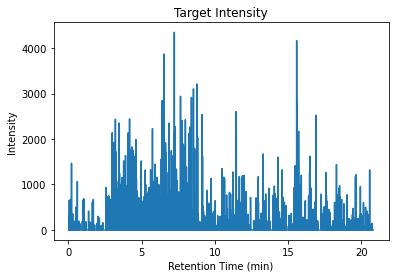

In [12]:
target = 182.5313
ppmTol = 1000

target_ll = target - target / 1000000 * ppmTol
target_hl = target + target / 1000000 * ppmTol

times = []
target_intensities = []

for n, spectrum in enumerate(msrun):

    if spectrum.ms_level != 1: continue

    print("below:")
    print(spectrum.reduce(mz_range=(target_ll, target_hl)))

    target_intensities.append(
        spectrum.reduce(mz_range=(target_ll, target_hl))[:, 1].sum()
    )

    times.append(spectrum.scan_time_in_minutes())

fig, ax = plt.subplots()
ax.plot(times, target_intensities)
ax.set_xlabel('Retention Time (min)')
ax.set_ylabel('Intensity')
ax.set_title('Target Intensity')
plt.show()

In [15]:
run = pymzml.run.Reader(
    mzml_file,
    MS_precisions = {
        1 : 5e-6,
        2 : 20e-6
    }
)
for entry in run:
    if isinstance(entry, pymzml.spec.Chromatogram):
        for time, intensity in entry.peaks:
            print(time, intensity)

In [16]:
plot_obj = pymzml.plot.Factory()

In [17]:
import os

import pymzml


def main():
    """
    This function shows how to plot a simple spectrum. It can be directly
    plotted via this script or using the python console.

    usage:

        ./plot_spectrum.py

    """

    example_file = mzml_file
    run = pymzml.run.Reader(example_file)
    p = pymzml.plot.Factory()
    for spec in run:
        p.new_plot()
        p.add(spec.peaks("centroided"), color=(0, 0, 0), style="sticks", name="peaks")
        filename = "example_plot_{0}_{1}.html".format(
            os.path.basename(example_file), spec.ID
        )
        p.save(filename=filename)
        print("Plotted file: {0}".format(filename))
        break


if __name__ == "__main__":
    main()

NameError: name 'go' is not defined

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode()

trace0 = go.Scatter(
  x=[1, 2, 3, 4],
  y=[10, 15, 13, 17]
)
data = go.Data([trace0])

py.iplot(data)